# **SVD and PCA on Medical Image Dataset**
performed by 
**SARVADA SHRIYA**
802031020(ME-SE)



In [ ]:
from glob import glob
import os
import cv2
import pandas as pd 
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt

img_width, img_height = 128, 128

files = sorted(glob('head_ct/*.png'))

labels = pd.read_csv('labels.csv')[' hemorrhage'].tolist()

images = np.empty((len(files), img_width, img_height))

for i, _file in enumerate(files):
    images[i, :, :] = cv2.resize(cv2.imread(_file, 0), (img_width, img_height))
images.shape

(200, 128, 128)

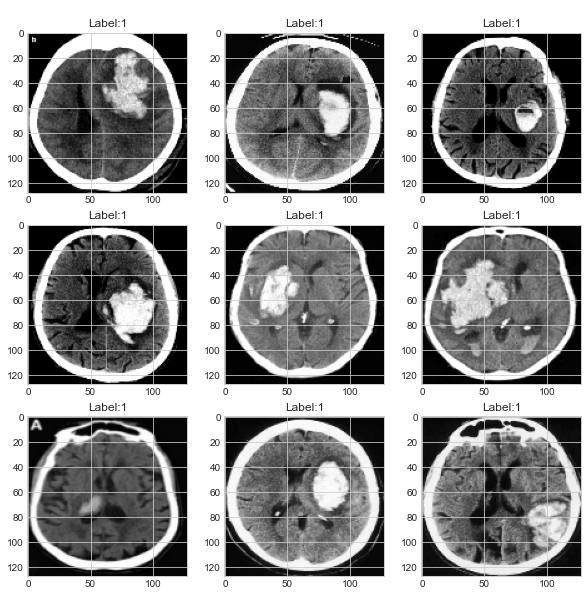

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.title("\nLabel:{}".format(labels[i]))
plt.show()

**PERFORMING SVD ON IMAGES**

In [ ]:
U, s, V = np.linalg.svd(images[0]) # Here the image is decomposed and reconstructed using multiple singular values

In [ ]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained[0:20] # These show the variance of top singualar vectors

array([0.611, 0.125, 0.082, 0.053, 0.033, 0.02 , 0.018, 0.008, 0.005,
       0.004, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.001])

Reconstructing matrix from SVD using different components

In [ ]:
num_components = 5
reconst_img_5 = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])
num_components = 50
reconst_img_50 = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])
num_components = 100
reconst_img_100 = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])
num_components = 1000
reconst_img_1000 = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])

Plotting Reconstrucrted Images

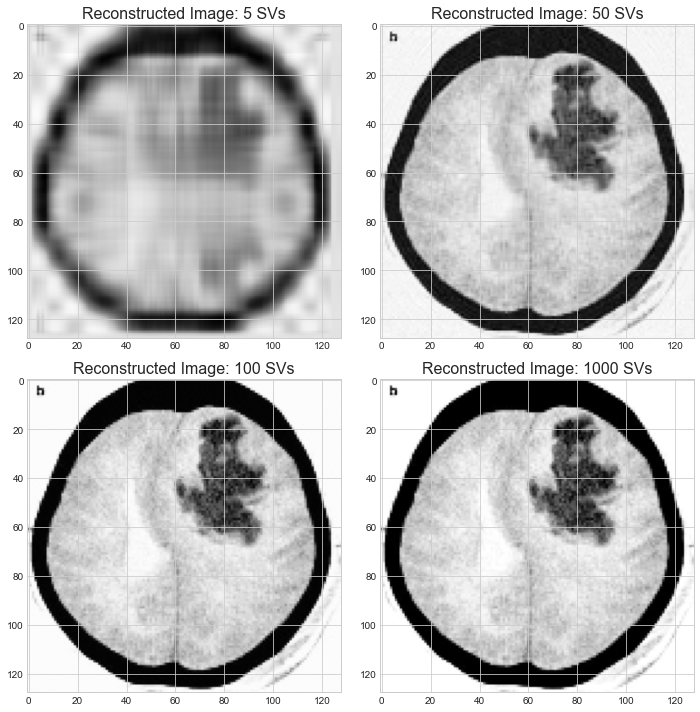

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].imshow(reconst_img_5)
axs[0, 0].set_title('Reconstructed Image: 5 SVs', size=16)
axs[0, 1].imshow(reconst_img_50)
axs[0, 1].set_title('Reconstructed Image: 50 SVs', size=16)
axs[1, 0].imshow(reconst_img_100)
axs[1, 0].set_title('Reconstructed Image: 100 SVs', size=16)
axs[1, 1].imshow(reconst_img_1000)
axs[1, 1].set_title('Reconstructed Image: 1000 SVs', size=16)
plt.tight_layout()

# PCA Reduction and Reconstruction 

In [ ]:
from sklearn.decomposition import PCA

Reduction using different components

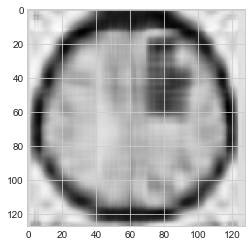

In [ ]:
pca_5 = PCA(n_components=5) # With 5 components
pca_5.fit(images[0])
pca_5_reduced = pca_5.fit_transform(images[0])
pca_5_recovered = pca_5.inverse_transform(pca_5_reduced)
plt.imshow(pca_5_recovered)

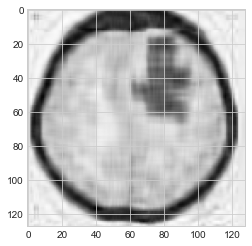

In [ ]:
pca_10 = PCA(n_components=10) # With 10omponents
pca_10.fit(images[0])
pca_10_reduced = pca_10.fit_transform(images[0])
pca_10_recovered = pca_10.inverse_transform(pca_10_reduced)
plt.imshow(pca_10_recovered)

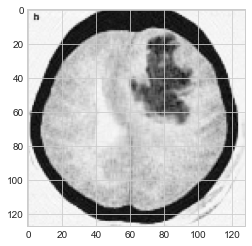

In [ ]:
pca_50 = PCA(n_components=50) # With 50 components
pca_50.fit(images[0])
pca_50_reduced = pca_50.fit_transform(images[0])
pca_50_recovered = pca_50.inverse_transform(pca_50_reduced)
plt.imshow(pca_50_recovered)

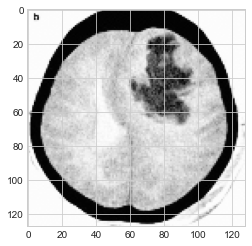

In [ ]:
pca_100 = PCA(n_components=100) # With 100 components
pca_100.fit(images[0])
pca_100_reduced = pca_100.fit_transform(images[0])
pca_100_recovered = pca_100.inverse_transform(pca_100_reduced)
plt.imshow(pca_100_recovered)